In [ ]:
# ML Assignment: Supervised Regression for Bright Pixel Localization

Project Workflow:

1.    Dataset Generation

        Randomly generate 50x50 images with one white pixel (255) and others black (0).

        Save the corresponding coordinates of the white pixel as the target (x, y).

2.    Model Architecture

        Use a simple Convolutional Neural Network (CNN) or fully connected model.

        Output layer will have 2 neurons (for x and y), with linear activation.

3.    Training Setup

        Loss function: Mean Squared Error (MSE).

        Evaluation: Plot predicted vs ground truth coordinates.

4.    Visualization

        Showed examples of input image, true vs predicted coordinate.

        Include training/validation loss curves.

5.    Code Quality

        Ensuring clean code with PEP8 formatting and comments.

In [13]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random


In [14]:
# Set seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Image dimensions and dataset size
IMG_SIZE = 50
NUM_SAMPLES = 5000

In [15]:
# Function to generate the dataset
def generate_dataset(num_samples, img_size):
    images = []
    labels = []
    for _ in range(num_samples):
        img = np.zeros((img_size, img_size), dtype=np.uint8)
        # Create a black image of size (img_size x img_size)

        # Choose a random coordinate for the bright pixel
        x = random.randint(0, img_size - 1)
        y = random.randint(0, img_size - 1)

        # Set the bright pixel (value 255)
        img[y, x] = 255

        # Append the image and its corresponding (x, y) label
        images.append(img)
        labels.append([x, y])

    # Convert lists to numpy arrays
    images = np.array(images).astype('float32') / 255.0
    images = np.expand_dims(images, axis=-1)
    labels = np.array(labels).astype('float32')
    return images, labels


In [16]:
# Generate synthetic training data
X, y = generate_dataset(NUM_SAMPLES, IMG_SIZE)

# Train-test split
# Split into training and validation sets (80/20)
split = int(0.8 * NUM_SAMPLES)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


In [17]:
# Define the CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # Output layer: predicts 2 values (x, y)
    layers.Dense(2)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model with MSE loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model architecture
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate model on Validation set
loss, mae = model.evaluate(X_val, y_val)
print(f"\nValidation MAE: {mae:.2f} pixels")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,434 (3.85 MB)

 Trainable params: 1,010,434 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - loss: 369.6999 - mae: 15.1701 - val_loss: 38.9306 - val_mae: 3.9497
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - loss: 32.8465 - mae: 3.6667 - val_loss: 20.8610 - val_mae: 3.2339
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 18.7302 - mae: 2.8773 - val_loss: 12.5139 - val_mae: 2.4461
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 13.0585 - mae: 2.4580 - val_loss: 8.6745 - val_mae: 1.9978
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 9.6298 - mae: 2.0883 - val_loss: 6.5353 - val_mae: 1.7160
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 7.1112 - mae: 1.7627 - val_loss: 4.7289 - val_mae: 1.4374
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - loss: 5.1675 - mae: 1.4730 - val_loss: 3.3272 - val_mae: 1.1871
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - loss: 3.6345 - mae: 1.1976 - val_loss: 2.2585 - val_mae: 0.9596
Epoch 9/10
125/125 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


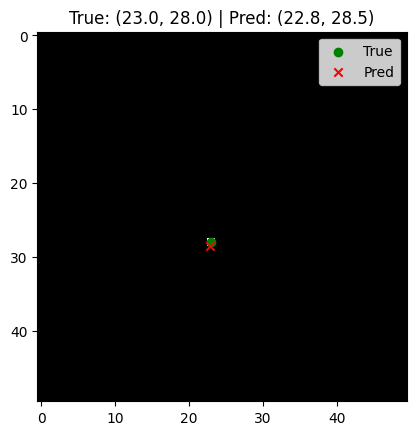

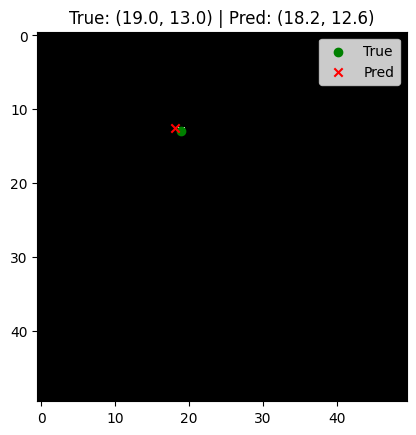

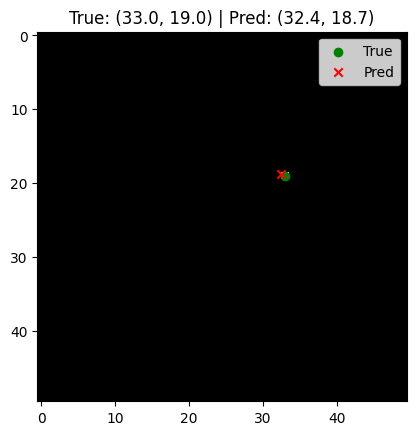

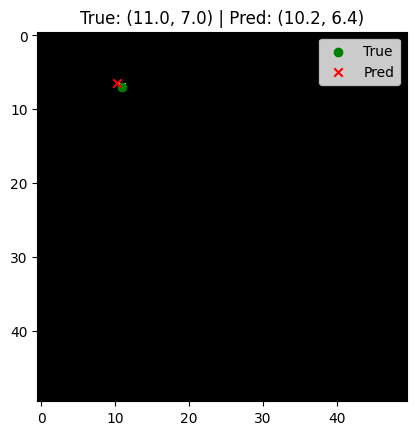

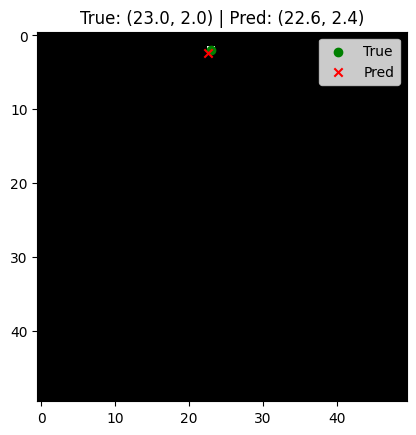

In [19]:
# Function to visualize predictions
def visualize_predictions(X, y_true, model, num_samples=5):
    preds = model.predict(X[:num_samples])
    for i in range(num_samples):
        img = X[i].squeeze()
        true_x, true_y = y_true[i]
        pred_x, pred_y = preds[i]
        plt.imshow(img, cmap='gray')
        plt.scatter([true_x], [true_y], c='green', label='True', marker='o')
        plt.scatter([pred_x], [pred_y], c='red', label='Pred', marker='x')
        plt.title(f"True: ({true_x:.1f}, {true_y:.1f}) | Pred: ({pred_x:.1f}, {pred_y:.1f})")
        plt.legend()
        plt.show()

visualize_predictions(X_val, y_val, model)
